# Scallop Transcriptome QC
Quality control and assembly metrics of v1 scallop transcriptome assembled using Trinity 2.5.1. Following recommendations by [Harvard FAS](https://informatics.fas.harvard.edu/best-practices-for-de-novo-transcriptome-assembly-with-trinity.html).

In [1]:
%%sh
/home/t.cri.ksilliman/Downloads/trinityrnaseq-Trinity-v2.6.5/util/TrinityStats.pl /scratch/t.cri.ksilliman/OA_RNA/Scallop/scallop-Trinity-v1/Trinity.fasta > Scallopv1_assembly.metrics

In [2]:
%cat Scallopv1_assembly.metrics



################################
## Counts of transcripts, etc.
################################
Total trinity 'genes':	201170
Total trinity transcripts:	522072
Percent GC: 37.34

########################################
Stats based on ALL transcript contigs:
########################################

	Contig N10: 4256
	Contig N20: 2770
	Contig N30: 1981
	Contig N40: 1451
	Contig N50: 1065

	Median contig length: 432
	Average contig: 731.24
	Total assembled bases: 381759437


#####################################################
## Stats based on ONLY LONGEST ISOFORM per 'GENE':
#####################################################

	Contig N10: 4569
	Contig N20: 2974
	Contig N30: 2116
	Contig N40: 1528
	Contig N50: 1101

	Median contig length: 380
	Average contig: 702.63
	Total assembled bases: 141348371





## Assessing read support

In [9]:
%%sh
module load gcc/6.2.0
module load bowtie2/2.3.2

bowtie2-build --threads 10 /scratch/t.cri.ksilliman/OA_RNA/Scallop/scallop-Trinity-v1/Trinity.fasta /scratch/t.cri.ksilliman/OA_RNA/Scallop/scallop-Trinity-v1/trinity-v1 

Settings:
  Output files: "/scratch/t.cri.ksilliman/OA_RNA/Scallop/scallop-Trinity-v1/trinity-v1.*.bt2"
  Line rate: 6 (line is 64 bytes)
  Lines per side: 1 (side is 64 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Max bucket size: default
  Max bucket size, sqrt multiplier: default
  Max bucket size, len divisor: 40
  Difference-cover sample period: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  /scratch/t.cri.ksilliman/OA_RNA/Scallop/scallop-Trinity-v1/Trinity.fasta
Reading reference sizes
  Time reading reference sizes: 00:00:07
Calculating joined length
Writing header
Reserving space for joined string
Joining reference sequences
  Time to join reference sequences: 00:00:02
bmax according to bmaxDivN setting: 9543985
Using parameters --bmax 7157989 --dcv 1024
  Doing ahead-of-time memory usage test
  Pa

Building a SMALL index


In [11]:
%%sh
module load gcc/6.2.0
module load samtools/1.6.0
module load bowtie2/2.3.2

cd /scratch/t.cri.ksilliman/OA_RNA/Scallop/filtered_RNASeq/

A="CG-AM_S1_filt.1.fq.gz,CG-AC_S2_filt.1.fq.gz,CG-AG_S3_filt.1.fq.gz,CG-AA_S4_filt.1.fq.gz,CG-BM_S5_filt.1.fq.gz,CG-BC_S6_filt.1.fq.gz,CG-BG_S7_filt.1.fq.gz,CG-BA_S8_filt.1.fq.gz"
B="CG-AM_S1_filt.2.fq.gz,CG-AC_S2_filt.2.fq.gz,CG-AG_S3_filt.2.fq.gz,CG-AA_S4_filt.2.fq.gz,CG-BM_S5_filt.2.fq.gz,CG-BC_S6_filt.2.fq.gz,CG-BG_S7_filt.2.fq.gz,CG-BA_S8_filt.2.fq.gz"

bowtie2 -p 10 --local --no-unal -x /scratch/t.cri.ksilliman/OA_RNA/Scallop/scallop-Trinity-v1/trinity-v1 -q \
-1 $A -2 $B | samtools view -Sb - | samtools sort -no - - > /scratch/t.cri.ksilliman/OA_RNA/Scallop/scallop-Trinity-v1/bowtie2.nameSorted.bam


348425553 reads; of these:
  348425553 (100.00%) were paired; of these:
    24657454 (7.08%) aligned concordantly 0 times
    71950320 (20.65%) aligned concordantly exactly 1 time
    251817779 (72.27%) aligned concordantly >1 times
    ----
    24657454 pairs aligned concordantly 0 times; of these:
      1442267 (5.85%) aligned discordantly 1 time
    ----
    23215187 pairs aligned 0 times concordantly or discordantly; of these:
      46430374 mates make up the pairs; of these:
        20872570 (44.95%) aligned 0 times
        4541772 (9.78%) aligned exactly 1 time
        21016032 (45.26%) aligned >1 times
97.00% overall alignment rate
[bam_sort_core] merging from 257 files and 1 in-memory blocks...


In [20]:
%%sh
module load gcc/6.2.0
module load samtools/1.6.0
module load bowtie2/2.3.2

TrinityHome=/home/t.cri.ksilliman/Downloads/trinityrnaseq-Trinity-v2.6.5

$TrinityHome/util/SAM_nameSorted_to_uniq_count_stats.pl /scratch/t.cri.ksilliman/OA_RNA/Scallop/scallop-Trinity-v1/bowtie2.nameSorted.bam > concordstats.out 

[675,900,000]  lines read 



In [22]:
%%sh
cat concordstats.out

Stats for aligned rna-seq fragments (note, not counting those frags where neither left/right read aligned)


340072912 aligned fragments; of these:
  340072912 were paired; of these:
    16304813 aligned concordantly 0 times
    323768099 aligned concordantly exactly 1 time
    0 aligned concordantly >1 times
    ----
    16304813 pairs aligned concordantly 0 times; of these:
    12137525 aligned as improper pairs
    4167288 pairs had only one fragment end align to one or more contigs; of these:
       3078924 fragments had only the left /1 read aligned; of these:
            3078924 left reads mapped uniquely
            0 left reads mapped >1 times
       1088364 fragments had only the right /2 read aligned; of these:
            1088364 right reads mapped uniquely
            0 right reads mapped >1 times
Overall,  95.21% of aligned fragments aligned as proper pairs




### BUSCO assessment

In [26]:
%%sh

module load gcc/6.2.0
module load blast/2.6.0
module load hmmer/3.1b2

export PATH="/home/t.cri.ksilliman/Downloads/augustus/bin:$PATH"
export PATH="/home/t.cri.ksilliman/Downloads/augustus/scripts:$PATH"
export AUGUSTUS_CONFIG_PATH="/home/t.cri.ksilliman/Downloads/augustus/config/"
BUSCO="/home/t.cri.ksilliman/Downloads/busco-master-c3aaf72e33f90932328f44b2e36469f2445918e0"
assembly="/scratch/t.cri.ksilliman/OA_RNA/Scallop/scallop-Trinity-v1/Trinity.fasta"

python $BUSCO/scripts/run_BUSCO.py -c 10 -i $assembly -o v1-busco -l /home/t.cri.ksilliman/OA_RNA/metazoa_odb9 -m tran 

INFO	****************** Start a BUSCO 3.0.2 analysis, current time: 02/26/2018 10:37:30 ******************
INFO	Configuration loaded from /home/t.cri.ksilliman/Downloads/busco-master-c3aaf72e33f90932328f44b2e36469f2445918e0/scripts/../config/config.ini
INFO	Init tools...
INFO	Check dependencies...
INFO	Check input file...
INFO	To reproduce this run: python /home/t.cri.ksilliman/Downloads/busco-master-c3aaf72e33f90932328f44b2e36469f2445918e0/scripts/run_BUSCO.py -i /scratch/t.cri.ksilliman/OA_RNA/Scallop/scallop-Trinity-v1/Trinity.fasta -o v1-busco -l /home/t.cri.ksilliman/OA_RNA/metazoa_odb9/ -m transcriptome -c 10
INFO	Mode is: transcriptome
INFO	The lineage dataset is: metazoa_odb9 (eukaryota)
INFO	Temp directory is ./tmp/
INFO	****** Step 1/2, current time: 02/26/2018 10:37:43 ******
INFO	Create blast database...
INFO	[makeblastdb]	Building a new DB, current time: 02/26/2018 10:37:44
INFO	[makeblastdb]	New DB name:   /home/t.cri.ksilliman/OA_RNA/Scallop/tmp/v1-busco_2090446102
INFO	

In [30]:
%%sh
module load gcc/6.2.0
module load R/3.4.1
mkdir run_v1-busco/summary_plots
cp run_v1-busco/short_summary_v1-busco.txt run_v1-busco/summary_plots

BUSCO="/home/t.cri.ksilliman/Downloads/busco-master-c3aaf72e33f90932328f44b2e36469f2445918e0"

python $BUSCO/scripts/generate_plot.py -wd run_v1-busco/summary_plots

INFO	****************** Start plot generation at 02/26/2018 12:42:59 ******************
INFO	Load data ...
INFO	Loaded short_summary_v1-busco.txt successfully
INFO	Generate the R code ...
INFO	Run the R code ...
INFO	[Rscript]	[1] "Plotting the figure ..."
INFO	[Rscript]	[1] "Done"
INFO	[Rscript]	1 of 1 task(s) completed at 02/26/2018 12:43:05
INFO	Plot generation done. Total running time: 5.59013104439 seconds
INFO	Results written in run_v1-busco/summary_plots/



mkdir: cannot create directory `run_v1-busco/summary_plots': File exists


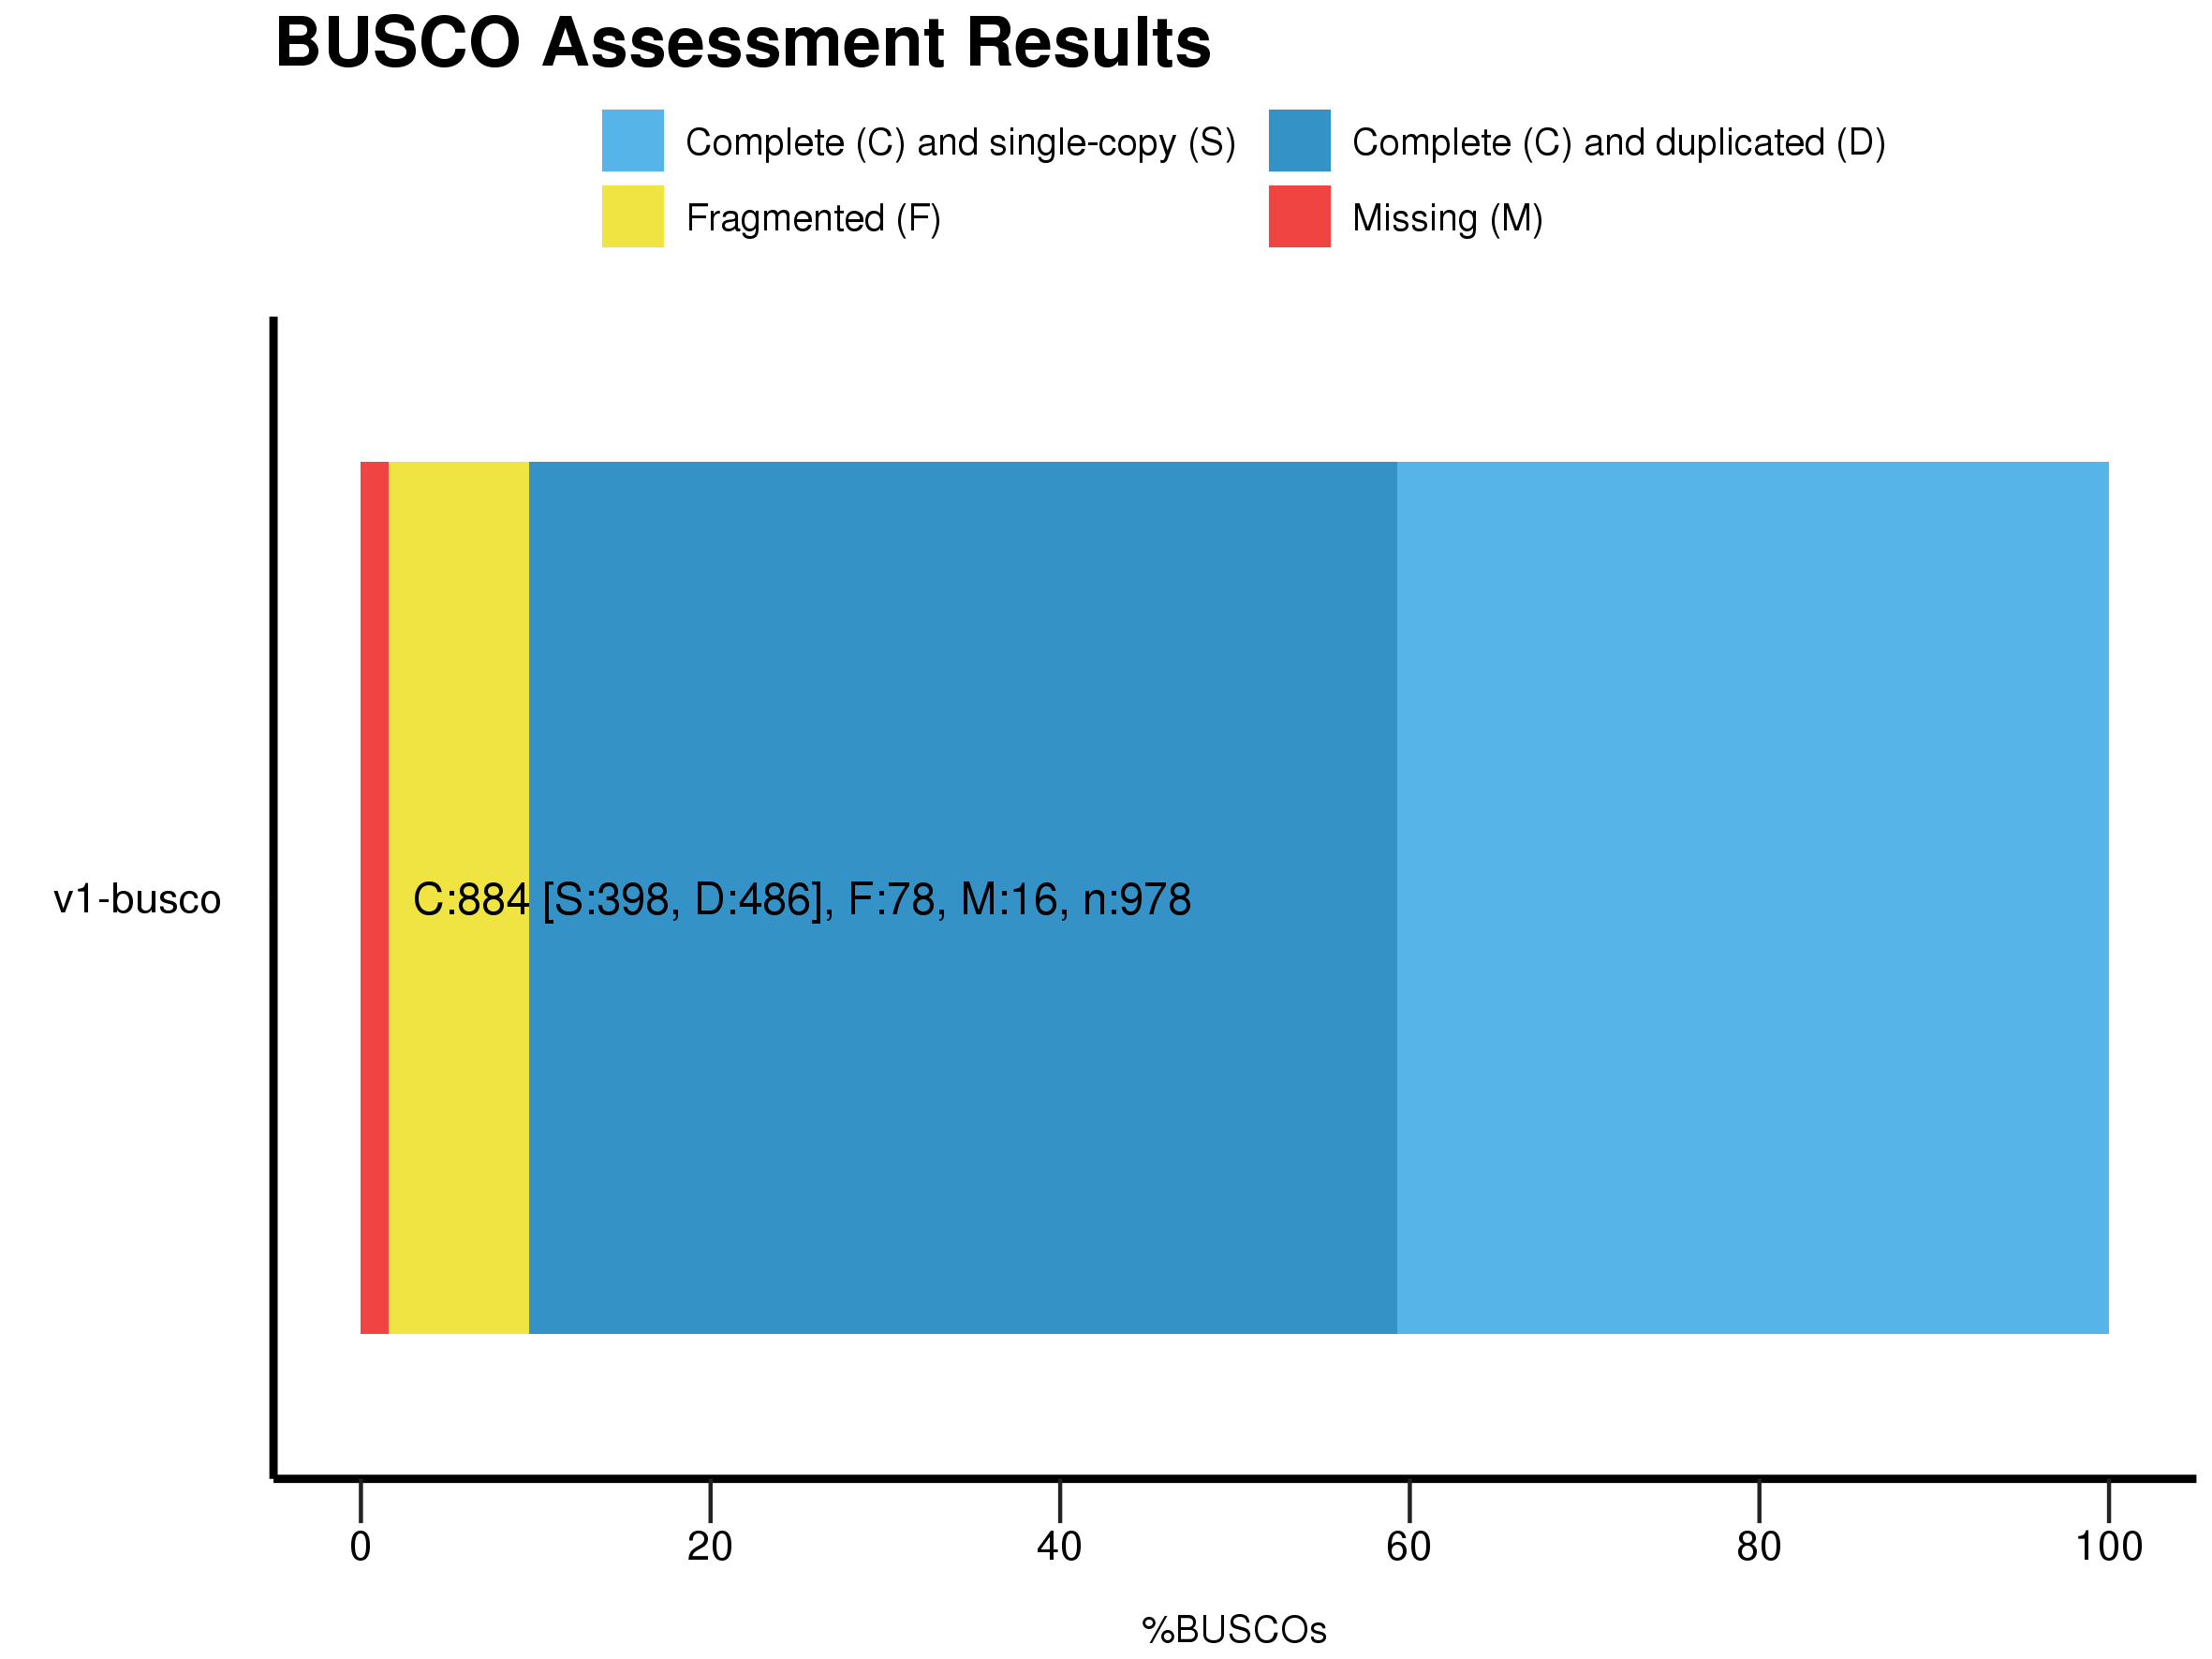

In [31]:
from IPython.display import Image
Image("run_v1-busco/summary_plots/busco_figure.png")